The fitted BM equation is:
 y = 1311.8187 * (x**3) + -583.2766 * (x**2) + 53.2180 * (x) + -1.2339
The lattice parameter is 2.04081511
V0 (equilibrium volume) is: 8.4998
B0 (bulk modulus) is: -137.2441
B0_prime (pressure derivative of bulk modulus) is: 13.4943


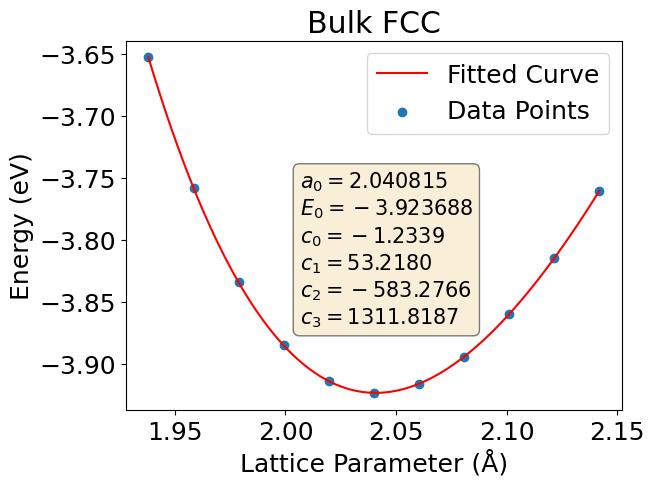

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# 从文件加载数据
a, E = np.loadtxt('data', usecols=(0,1), delimiter='\t', unpack=True)	 
x  = (a*2.04)**(-2)

# 三次多项式拟合
p = np.polyfit(x, E, 3)

c0 = p[3]
c1 = p[2]
c2 = p[1]
c3 = p[0]

print('The fitted BM equation is:')
print(' y = %.4f * (x**3) + %.4f * (x**2) + %.4f * (x) + %.4f' % (c3, c2, c1, c0))

# 计算平衡点对应的晶格参数 (通过导数求得极小值点)
x1 = (math.sqrt(4*c2**2 - 12*c1*c3) - 2*c2) / (6*c3)
para = 1 / math.sqrt(x1)
# 计算这些临界点对应的函数值
critical_points = x1
critical_values = c3 * critical_points**3 + c2 * critical_points**2 + c1 * critical_points + c0
print('The lattice parameter is %.8f' % para)

# 提取 Birch-Murnaghan 方程的参数
V0 = para**3  # 晶格参数的立方近似体积
B0 = 2 * c2 / V0  # 体模量
B0_prime = -6 * c3 / c2  # 体模量的压力导数

print('V0 (equilibrium volume) is: %.4f' % V0)
print('B0 (bulk modulus) is: %.4f' % B0)
print('B0_prime (pressure derivative of bulk modulus) is: %.4f' % B0_prime)

# 设置全局字体大小
plt.rcParams.update({'font.size': 18})
# 绘制E随x的散点图
plt.scatter(np.sqrt(1/x), E, label='Data Points')

# 绘制拟合曲线
x_fit = np.linspace(min(x), max(x), 100)
para_fit = np.sqrt(1/x_fit)
E_fit = c3 * x_fit**3 + c2 * x_fit**2 + c1 * x_fit + c0
plt.plot(para_fit, E_fit, color='red', label='Fitted Curve')

# 添加拟合参数到图中
textstr = f'$a_{0}={para:.6f}$'  +'\n' +f'$E_{0} = {critical_values:.6f}$' +'\n' + f'$c_0={c0:.4f}$' + '\n' + f'$c_1={c1:.4f}$' + '\n' + f'$c_2={c2:.4f}$' + '\n' + f'$c_3={c3:.4f}$'

# 添加文本框
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.35, 0.65, textstr, transform=plt.gca().transAxes, fontsize=15,
        verticalalignment='top', bbox=props)

# 添加图例和标签
plt.xlabel('Lattice Parameter (Å)')
plt.ylabel('Energy (eV)')
plt.legend()
plt.title('Bulk FCC')
plt.show()
# 保存图片
plt.savefig('fitted_curve_bulk_fcc.png')
